# SI 618: Data Manipulation and Analysis
## 07 - Natural Language Processing
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Outline for today
- announcements
  - Teplovs Office Hours this week: 3:45-5:00pm
  - no HTML,  no grade
- regular expressions redux
- ```spaCy```
    - Cleaning the data
    - Extracting linguistic features
- ```Word2Vec```
    - Vector representation of words
    - Word similarities
    - Vector algebra for semantics

# Why learn NLP?
- Natural language = human language
- We use language to learn about the world
- How machines understand human langauge?
- How can we quantify the meaning of language?

## Applications?
- Probabily any service that uses text as information
- Search engine, SNS
    - What's the document about?
    - How do you determine the similarity?
- Virtual assistants: Alexa, Google Assistant, Cortana, etc. 
    - Understand the semantic information from your speech from parsed text
- Biology, genetics
    - Genetic information / DNA sequence as text
    - Draw networks of proteins/molecules from vast amount of scientific papers 

# Regular Expressions

**Note:** we have included a [cheat sheet for regular expressions](python-regular-expressions-cheat-sheet.pdf).

Regular expressions are simply a way to find sequnces of characters within strings.  Let's use, as our text, "Bereft", a poem by Robert Frost:

In [1]:
bereft = """Where had I heard this wind before
Change like this to a deeper roar?
What would it take my standing there for,
Holding open a restive door,
Looking down hill to a frothy shore?
Summer was past and the day was past.
Sombre clouds in the west were massed.
Out on the porch's sagging floor,
Leaves got up in a coil and hissed,
Blindly striking at my knee and missed.
Something sinister in the tone
Told me my secret my be known:
Word I was in the house alone
Somehow must have gotten abroad,
Word I was in my life alone,
Word I had no one left but God."""

To make our lives simpler (we'll discuss why this is the case in class), we're going to strip the newlines from the passage:

In [2]:
bereft = bereft.replace('\n',' ')

In [3]:
bereft

"Where had I heard this wind before Change like this to a deeper roar? What would it take my standing there for, Holding open a restive door, Looking down hill to a frothy shore? Summer was past and the day was past. Sombre clouds in the west were massed. Out on the porch's sagging floor, Leaves got up in a coil and hissed, Blindly striking at my knee and missed. Something sinister in the tone Told me my secret my be known: Word I was in the house alone Somehow must have gotten abroad, Word I was in my life alone, Word I had no one left but God."

Let's say we wanted to find all the occurrences of the word "alone".   We could use  plain old string functions:

In [4]:
bereft.find('alone')

451

In [5]:
if 'alone' in bereft:
    print('Yup, found it')

Yup, found it


In [6]:
bereft.count('alone')

2

Ok, now try it yourself:  
### <font color="magenta">Q1: How many times does the word ```was``` appear in the poem?</a>

In [7]:
bereft.count('was')

4

So far, so good.  Now let's make things a bit more interesting.  How many words are there that contain the letters ```one``` ?

In [8]:
bereft.count('one')

4

In [9]:
import re

In [10]:
re.findall('one',bereft)

['one', 'one', 'one', 'one']

But what if we wanted to know the words that contained ```one``` instead of just the count?  Enter regular expressions!

In [11]:
re.findall('[a-z]+one',bereft)

['tone', 'alone', 'alone']

### Some useful online resources:

* www.debuggex.com
* www.regexr.com

In [12]:
re.search('[a-z]*one',bereft)

<re.Match object; span=(391, 395), match='tone'>

In [13]:
match = re.search('[a-z]*one', bereft)

In [14]:
if match:
    print("Found it!")

Found it!


In [15]:
if match:
    print("Found it!")
    print(match.group(0))

Found it!
tone


### Match Groups

In the above example, we used ```match.group(0)``` to extract the entire match.

Match groups also allow you to extract only certain parts of the match.  In the previous example, say we wanted to know which letters preceded the letters 'one'.  We could use match groups, specified by paretheses, to extract only certain parts.

In [16]:
match = re.search('([a-z]*)one', bereft)

In [17]:
if match:
    print("Found it!")
    print(match.group(0))
    print(match.group(1))

Found it!
tone
t


How would we extract all the letters that precede *one*?  Use ```re.finditer()```

In [18]:
matches = re.finditer('([a-z]*)one', bereft)

In [19]:
for match in matches:
    print(match.group(0),match.group(1))

tone t
alone al
alone al
one 


In [20]:
re.split(',',bereft)

['Where had I heard this wind before Change like this to a deeper roar? What would it take my standing there for',
 ' Holding open a restive door',
 " Looking down hill to a frothy shore? Summer was past and the day was past. Sombre clouds in the west were massed. Out on the porch's sagging floor",
 ' Leaves got up in a coil and hissed',
 ' Blindly striking at my knee and missed. Something sinister in the tone Told me my secret my be known: Word I was in the house alone Somehow must have gotten abroad',
 ' Word I was in my life alone',
 ' Word I had no one left but God.']

### <font color="magenta">Q2: Experiment with various regular expressions such as \W, \w, \s, \S to see how the poem can be split.

In [25]:
re.split('\W', bereft)

['Where',
 'had',
 'I',
 'heard',
 'this',
 'wind',
 'before',
 'Change',
 'like',
 'this',
 'to',
 'a',
 'deeper',
 'roar',
 '',
 'What',
 'would',
 'it',
 'take',
 'my',
 'standing',
 'there',
 'for',
 '',
 'Holding',
 'open',
 'a',
 'restive',
 'door',
 '',
 'Looking',
 'down',
 'hill',
 'to',
 'a',
 'frothy',
 'shore',
 '',
 'Summer',
 'was',
 'past',
 'and',
 'the',
 'day',
 'was',
 'past',
 '',
 'Sombre',
 'clouds',
 'in',
 'the',
 'west',
 'were',
 'massed',
 '',
 'Out',
 'on',
 'the',
 'porch',
 's',
 'sagging',
 'floor',
 '',
 'Leaves',
 'got',
 'up',
 'in',
 'a',
 'coil',
 'and',
 'hissed',
 '',
 'Blindly',
 'striking',
 'at',
 'my',
 'knee',
 'and',
 'missed',
 '',
 'Something',
 'sinister',
 'in',
 'the',
 'tone',
 'Told',
 'me',
 'my',
 'secret',
 'my',
 'be',
 'known',
 '',
 'Word',
 'I',
 'was',
 'in',
 'the',
 'house',
 'alone',
 'Somehow',
 'must',
 'have',
 'gotten',
 'abroad',
 '',
 'Word',
 'I',
 'was',
 'in',
 'my',
 'life',
 'alone',
 '',
 'Word',
 'I',
 'had',
 '

## How about a few rounds of regex golf?

### <font color="magenta">Q3: See how well you can do at your tables: https://alf.nu/RegexGolf</a></font>
Record your final score below

16 after the first 4 holes

## Applying regex to pandas DataFrames (from last class) 

As usual, let's load up some data:

In [26]:
import pandas as pd

In [27]:
reviews = pd.read_csv('data/amazon_food_reviews.zip')

Let's take a really small sample, just so we can experiment with the various 

In [28]:
reviews_sample = reviews.head(10)

In [29]:
reviews_sample

,Id,ProductId,User Id,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Let's review some basic string functionality from Pandas that can be applied to any Series or Index:

In [30]:
reviews_sample.ProfileName.str.lower()

0                         delmartian
1                             dll pa
2    natalia corres "natalia corres"
3                               karl
4      michael d. bigham "m. wassir"
5                     twoapennything
6                  david c. sullivan
7                 pamela g. williams
8                           r. james
9                      carol a. reed
Name: ProfileName, dtype: object

In [31]:
reviews_sample.ProfileName.str.upper()

0                         DELMARTIAN
1                             DLL PA
2    NATALIA CORRES "NATALIA CORRES"
3                               KARL
4      MICHAEL D. BIGHAM "M. WASSIR"
5                     TWOAPENNYTHING
6                  DAVID C. SULLIVAN
7                 PAMELA G. WILLIAMS
8                           R. JAMES
9                      CAROL A. REED
Name: ProfileName, dtype: object

In [32]:
reviews_sample.Summary.str.len()

0    21
1    17
2    21
3    14
4    11
5    10
6    45
7    22
8    10
9    16
Name: Summary, dtype: int64

Remember, the ```columns``` attribute of a DataFrame is an Index object, which means that we can use str operators on the column names:

In [33]:
reviews_sample.columns

Index(['Id', 'ProductId', 'User Id ', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [34]:
reviews_sample.columns.str.lower()

Index(['id', 'productid', 'user id ', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

Notice that the "User Id" column of the dataframe looks weird:  it has a space in the middle *and* at the end.  Columns that are named like that will invariable trip us up in downstream (i.e. later) analyses, so it's wise to correct them now.  Something like the following can help:

In [35]:
reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

Index(['id', 'productid', 'user_id', 'profilename', 'helpfulnessnumerator',
       'helpfulnessdenominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

And we can assign that back to the columns attribute to actually rename the columns:


In [36]:
reviews_sample.columns = reviews_sample.columns.str.strip().str.lower().str.replace(' ','_')

In [37]:
reviews_sample

,id,productid,user_id,profilename,helpfulnessnumerator,helpfulnessdenominator,score,time,summary,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Splitting and Replacing Strings

Sometimes, we want to split strings into lists.  We might want to do that with the "summary" column:

In [38]:
reviews_sample.productid.str.split('00')

0    [B, 1E4KFG0]
1    [B, 813GRG4]
2    [B, 0LQOCH0]
3    [B, 0UA0QIQ]
4    [B, 6K2ZZ7K]
5    [B, 6K2ZZ7K]
6    [B, 6K2ZZ7K]
7    [B, 6K2ZZ7K]
8    [B, 0E7L2R4]
9    [B, 171APVA]
Name: productid, dtype: object

In [39]:
reviews_sample.productid.str.split('00').str.get(1)

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

Equivalently:

In [40]:
reviews_sample.productid.str.split('00').str[1]

0    1E4KFG0
1    813GRG4
2    0LQOCH0
3    0UA0QIQ
4    6K2ZZ7K
5    6K2ZZ7K
6    6K2ZZ7K
7    6K2ZZ7K
8    0E7L2R4
9    171APVA
Name: productid, dtype: object

### Replace (regex time!)

In [41]:
reviews_sample.summary.str.lower().str.replace('dog','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                      great taffy
5                                       nice taffy
6    great!  just as good as the expensive brands!
7                           wonderful, tasty taffy
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

In [42]:
reviews_sample.summary.str.lower().str.replace('dog|taffy','health')

0                         good quality health food
1                                not as advertised
2                            "delight" says it all
3                                   cough medicine
4                                     great health
5                                      nice health
6    great!  just as good as the expensive brands!
7                          wonderful, tasty health
8                                       yay barley
9                              healthy health food
Name: summary, dtype: object

### Extracting Substrings

In [43]:
reviews_sample.summary.str.extract(r'(Dog)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,Dog


In [44]:
reviews_sample.summary.str.extract(r'(Dog|Taffy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,NaN
5,Taffy
6,NaN
7,NaN
8,NaN
9,Dog


In [45]:
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)')

,0
0,Dog
1,NaN
2,NaN
3,NaN
4,taffy
5,Taffy
6,NaN
7,taffy
8,NaN
9,Dog


In [46]:
# returns a Series
reviews_sample.summary.str.extract(r'(Dog|[Tt]affy)', expand = False)

0      Dog
1      NaN
2      NaN
3      NaN
4    taffy
5    Taffy
6      NaN
7    taffy
8      NaN
9      Dog
Name: summary, dtype: object

In [47]:
reviews_sample.summary.str.extractall(r'(Dog|[Tt]affy)')

,,0
,match,
0,0,Dog
4,0,taffy
5,0,Taffy
7,0,taffy
9,0,Dog


In [48]:
reviews_sample.summary.str.extractall(r'(as)')

0
  match    
1 0      as
6 0      as
  1      as
7 0      as

### Testing for Strings that Match or Contain a Pattern

In [51]:
reviews_sample.text

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
5    I got a wild hair for taffy and ordered this f...
6    This saltwater taffy had great flavors and was...
7    This taffy is so good.  It is very soft and ch...
8    Right now I'm mostly just sprouting this so my...
9    This is a very healthy dog food. Good for thei...
Name: text, dtype: object

In [52]:
pattern = r'[Gg]ood'

In [53]:
reviews_sample.text.str.contains(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

In [54]:
reviews_sample.text.str.match(pattern)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: text, dtype: bool

In [55]:
pattern = r'.*[Gg]ood.*'

In [56]:
reviews_sample.text.str.match(pattern)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8    False
9     True
Name: text, dtype: bool

#### Helpful resources:
- Pandas text documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
- Regex Cheat Sheet: https://regexr.com/

### <font color="magenta">Q4: How many rows from the Amazon Food Reviews data set contain HTML tags in the ```text``` column?</font>

In [80]:
reviews.columns = reviews.columns.str.strip().str.lower().str.replace(' ', '_')
print(reviews.text.str.contains(r'<[/]*\w+>').sum(), 'rows found')
reviews.text.str.extract(r'(<[/]*\w+>)').dropna()

2106 rows found


,0
21,</a>
25,</a>
39,</a>
158,</span>
348,</a>
369,</a>
370,</a>
398,</a>
430,</a>
466,</a>


### <font color="magenta">Q5: Remove all HTML tags from the Amazon Food Reviews text column and save the results to a column called text_no_html.

In [81]:
reviews['text_no_html'] = reviews.text.str.replace(r'<[/]*\w+>', '')

## NOTE: Install the spaCy and gensim libraries now.  Windows users will need to implement some work-arounds to get spaCy to work properly.

# spaCy

In [82]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- Fast, and extensible NLP package for Python
- <https://spacy.io/>

In [83]:
import spacy

In [84]:
# You will need to do this only once
! python -m spacy download en

  Running setup.py install for en-core-web-sm: started
    Running setup.py install for en-core-web-sm: finished with status 'done'

    Error: Couldn't link model to 'en'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\dteng\Anaconda\lib\site-packages\en_core_web_sm -->
    C:\Users\dteng\Anaconda\lib\site-packages\spacy\data\en


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [85]:
# loading up the language model: English
# Windows users will need to follow the instructions in Slack to modify the next line
nlp = spacy.load(r'C:\Users\dteng\Anaconda\Lib\site-packages\en_core_web_sm\en_core_web_sm-2.0.0')

# Cleaning Text Data

In [86]:
# from https://en.wikipedia.org/wiki/Portal:History
sentences = """History (from Greek ἱστορία, historia, meaning "inquiry, knowledge acquired by investigation") is the study of the past as it is described in written documents. Events occurring before written record are considered prehistory. It is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events. Scholars who write about history are called historians.

History can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events, and objectively determine the patterns of cause and effect that determine them. Historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing "perspective" on the problems of the present.

Stories common to a particular culture, but not supported by external sources (such as the tales surrounding King Arthur), are usually classified as cultural heritage or legends, because they do not show the "disinterested investigation" required of the discipline of history. Herodotus, a 5th-century BC Greek historian is considered within the Western tradition to be the "father of history", and, along with his contemporary Thucydides, helped form the foundations for the modern study of human history. Their works continue to be read today, and the gap between the culture-focused Herodotus and the military-focused Thucydides remains a point of contention or approach in modern historical writing. In East Asia, a state chronicle, the Spring and Autumn Annals was known to be compiled from as early as 722 BC although only 2nd-century BC texts survived.

Ancient influences have helped spawn variant interpretations of the nature of history which have evolved over the centuries and continue to change today. The modern study of history is wide-ranging, and includes the study of specific regions and the study of certain topical or thematical elements of historical investigation. Often history is taught as part of primary and secondary education, and the academic study of history is a major discipline in university studies."""

### Section goal: calculate the frequency of each word
- See which words are more frequent.
- Generate more meaningful summary for the above paragraph.

## Lowering the case

In [87]:
type(sentences)

str

In [88]:
sentences

'History (from Greek ἱστορία, historia, meaning "inquiry, knowledge acquired by investigation") is the study of the past as it is described in written documents. Events occurring before written record are considered prehistory. It is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events. Scholars who write about history are called historians.\n\nHistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events, and objectively determine the patterns of cause and effect that determine them. Historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing "perspective" on the problems of the present.\n\nStories common to a particular culture, but not supported by external sources (such as the tales surrounding King Arthur), ar

In [89]:
sent_low = sentences.lower()

In [90]:
sent_low

'history (from greek ἱστορία, historia, meaning "inquiry, knowledge acquired by investigation") is the study of the past as it is described in written documents. events occurring before written record are considered prehistory. it is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events. scholars who write about history are called historians.\n\nhistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events, and objectively determine the patterns of cause and effect that determine them. historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing "perspective" on the problems of the present.\n\nstories common to a particular culture, but not supported by external sources (such as the tales surrounding king arthur), ar

## Removing punctuation and special characters

#### Exclude special characters one by one

In [91]:
# from https://www.programiz.com/python-programming/examples/remove-punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~''' # list of special characters you want to exclude
sent_low_pnct = ""
for char in sent_low:
    if char not in punctuations:
        sent_low_pnct = sent_low_pnct + char

sent_low_pnct

'history from greek ἱστορία historia meaning inquiry knowledge acquired by investigation is the study of the past as it is described in written documents events occurring before written record are considered prehistory it is an umbrella term that relates to past events as well as the memory discovery collection organization presentation and interpretation of information about these events scholars who write about history are called historians\n\nhistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events and objectively determine the patterns of cause and effect that determine them historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing perspective on the problems of the present\n\nstories common to a particular culture but not supported by external sources such as the tales surrounding king arthur are usually classified as c

#### Alternatively, we can use regular expression to remove punctuation:
- So we don't have to list up all possible special characters that we want to remove
- https://docs.python.org/3.4/library/re.html
- https://en.wikipedia.org/wiki/Regular_expression

In [92]:
import re
sent_low_pnct2 = re.sub(r'[^\w\s]', '', sent_low)

In [93]:
sent_low_pnct2

'history from greek ἱστορία historia meaning inquiry knowledge acquired by investigation is the study of the past as it is described in written documents events occurring before written record are considered prehistory it is an umbrella term that relates to past events as well as the memory discovery collection organization presentation and interpretation of information about these events scholars who write about history are called historians\n\nhistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events and objectively determine the patterns of cause and effect that determine them historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing perspective on the problems of the present\n\nstories common to a particular culture but not supported by external sources such as the tales surrounding king arthur are usually classified as c

- However, special character ```\n``` (linebreak) still exists in both cases. Let's remove these additionally.

In [94]:
import os
os.linesep

'\r\n'

In [97]:
sent_low_pnct = sent_low_pnct.replace('\n\n', " ")
sent_low_pnct

'history from greek ἱστορία historia meaning inquiry knowledge acquired by investigation is the study of the past as it is described in written documents events occurring before written record are considered prehistory it is an umbrella term that relates to past events as well as the memory discovery collection organization presentation and interpretation of information about these events scholars who write about history are called historians history can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events and objectively determine the patterns of cause and effect that determine them historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing perspective on the problems of the present stories common to a particular culture but not supported by external sources such as the tales surrounding king arthur are usually classified as cultura

### $\rightarrow$ 3 possible ways to replace characters!

### <font color='magenta'> Q6. How would you remove numbers from the paragraph? </font>

In [103]:
sent_low_pnct = re.sub(r'\d+', ' ', sent_low_pnct2)
sent_low_pnct

'history from greek ἱστορία historia meaning inquiry knowledge acquired by investigation is the study of the past as it is described in written documents events occurring before written record are considered prehistory it is an umbrella term that relates to past events as well as the memory discovery collection organization presentation and interpretation of information about these events scholars who write about history are called historians\n\nhistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events and objectively determine the patterns of cause and effect that determine them historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing perspective on the problems of the present\n\nstories common to a particular culture but not supported by external sources such as the tales surrounding king arthur are usually classified as c

## Removing stop words

- Stop words usually refers to the most common words in a language
    - No single universial stopwords
    - Often stopwords are removed to improve the performance of NLP models
    - https://en.wikipedia.org/wiki/Stop_words
    - https://en.wikipedia.org/wiki/Most_common_words_in_English

#### Import the list of stop words from ```spaCy```

In [104]:
from spacy.lang.en.stop_words import STOP_WORDS

In [105]:
np.array(STOP_WORDS)

array({'as', 'per', 'say', 'again', 'hence', 'own', 'where', 'whereby', 'could', 'whole', 'nor', 'often', 'herein', 'therein', 'otherwise', 'an', 'something', 'him', 'someone', 'former', 'up', 'ourselves', 'are', 'each', 'fifty', 'than', 'twenty', 'elsewhere', 'ca', 'ours', 'became', 'is', 'go', 'first', 'another', 'several', 'to', 'during', 'amongst', 'noone', 'now', 'towards', 'you', 'or', 'please', 'together', 'even', 'back', 'nobody', 'somewhere', 'become', 'does', 'its', 'though', 'whereafter', 'what', 'becomes', 'we', 'mine', 'meanwhile', 'well', 'she', 'only', 'can', 'unless', 'rather', 'there', 'wherever', 'latter', 'because', 'call', 'some', 'onto', 'sometime', 'whereupon', 'however', 'themselves', 'into', 'ten', 'give', 'serious', 'they', 'hereby', 'namely', 'myself', 'used', 'whose', 'upon', 'without', 'quite', 'three', 'enough', 'if', 'beside', 'less', 'has', 'nevertheless', 'until', 'almost', 'seemed', 'anything', 'thru', 'behind', 'eight', 'formerly', 'top', 'from', 'any'

#### Goal: We are going to count the frequency of each word from the paragraph, to see which words can be used to represent the paragraph's content. 

#### What if we do not remove stopwords?

In [106]:
from collections import Counter

- Note that our paragraph is stored as a single string object...

In [107]:
sent_low_pnct

'history from greek ἱστορία historia meaning inquiry knowledge acquired by investigation is the study of the past as it is described in written documents events occurring before written record are considered prehistory it is an umbrella term that relates to past events as well as the memory discovery collection organization presentation and interpretation of information about these events scholars who write about history are called historians\n\nhistory can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events and objectively determine the patterns of cause and effect that determine them historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing perspective on the problems of the present\n\nstories common to a particular culture but not supported by external sources such as the tales surrounding king arthur are usually classified as c

- Split the paragraph into a list of words

In [108]:
words = sent_low_pnct.split()

- Count the words from the list
- Words that can occur in any kind of paragraphs...?

In [109]:
Counter(words).most_common(10)

[('the', 27),
 ('of', 21),
 ('and', 15),
 ('history', 11),
 ('as', 10),
 ('to', 8),
 ('a', 8),
 ('is', 7),
 ('study', 7),
 ('in', 5)]

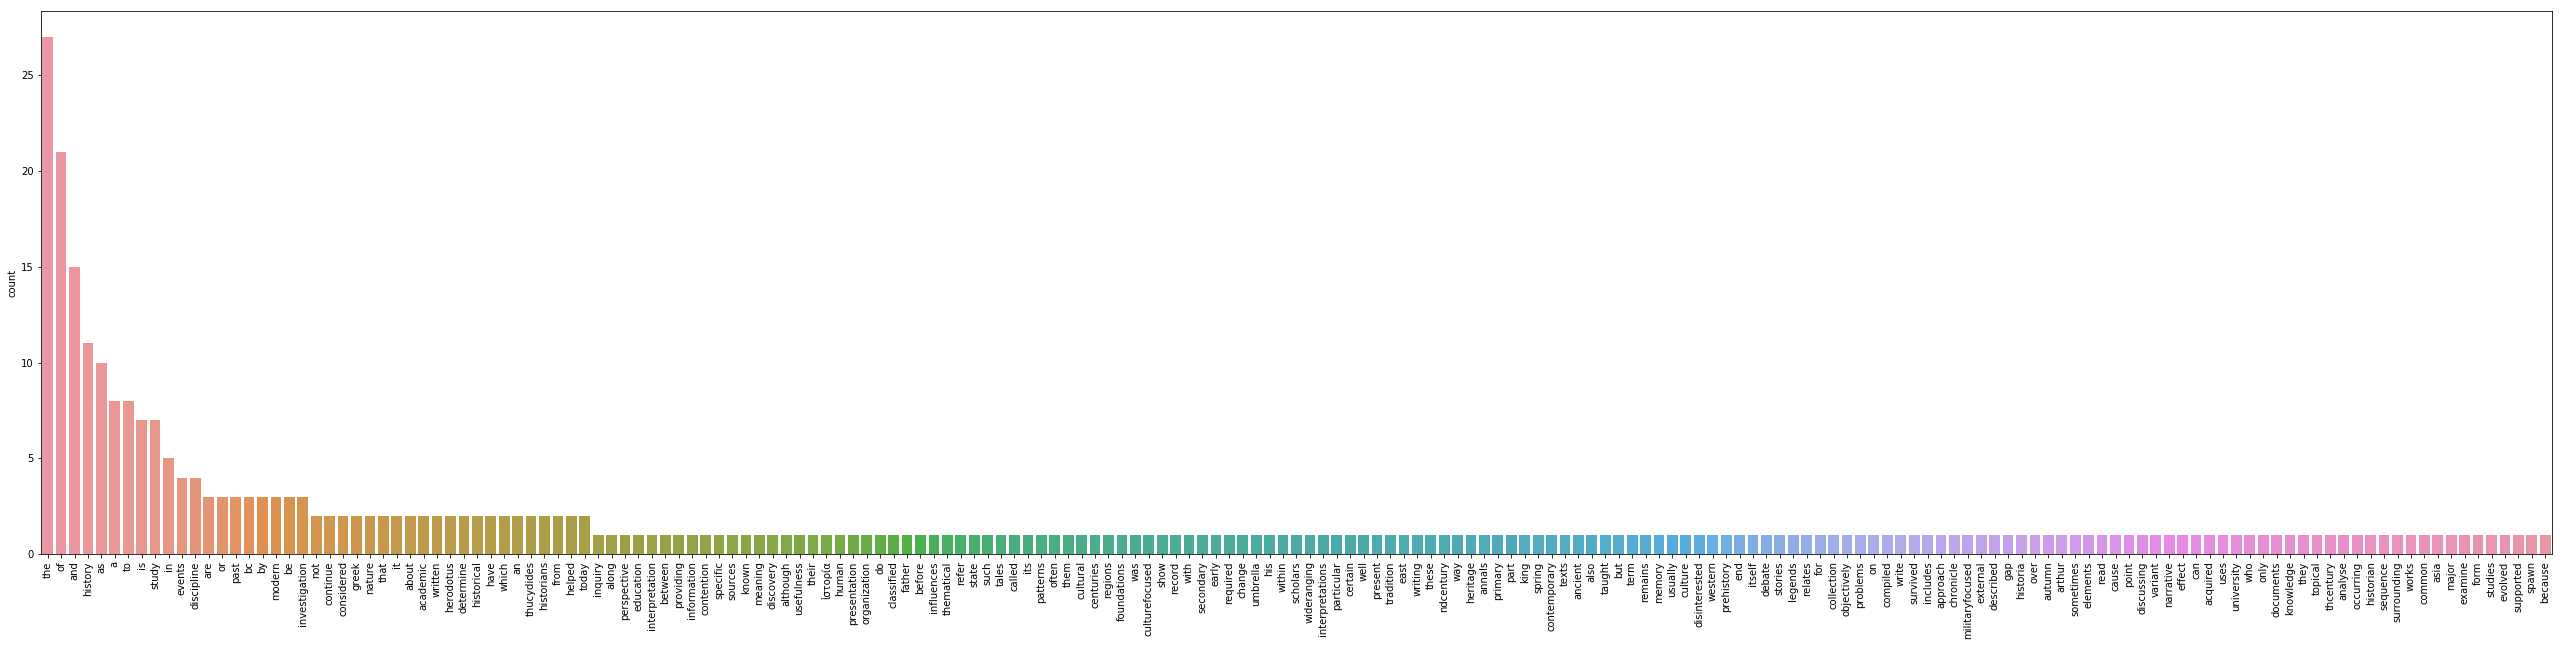

In [110]:
plt.figure(figsize=(45,10))
sns.countplot(words, order=pd.Series(words).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

#### When we removed stopwords:

In [111]:
# split sentence into words
words_nostop = list()
for word in words:
    if word not in STOP_WORDS:
        words_nostop.append(word)
# words_nostop = [word for word in words if word not in STOP_WORDS]

- More comprehensible, and unique list or words!

In [112]:
Counter(words_nostop).most_common(10)

[('history', 11),
 ('study', 7),
 ('events', 4),
 ('discipline', 4),
 ('investigation', 3),
 ('past', 3),
 ('bc', 3),
 ('modern', 3),
 ('greek', 2),
 ('written', 2)]

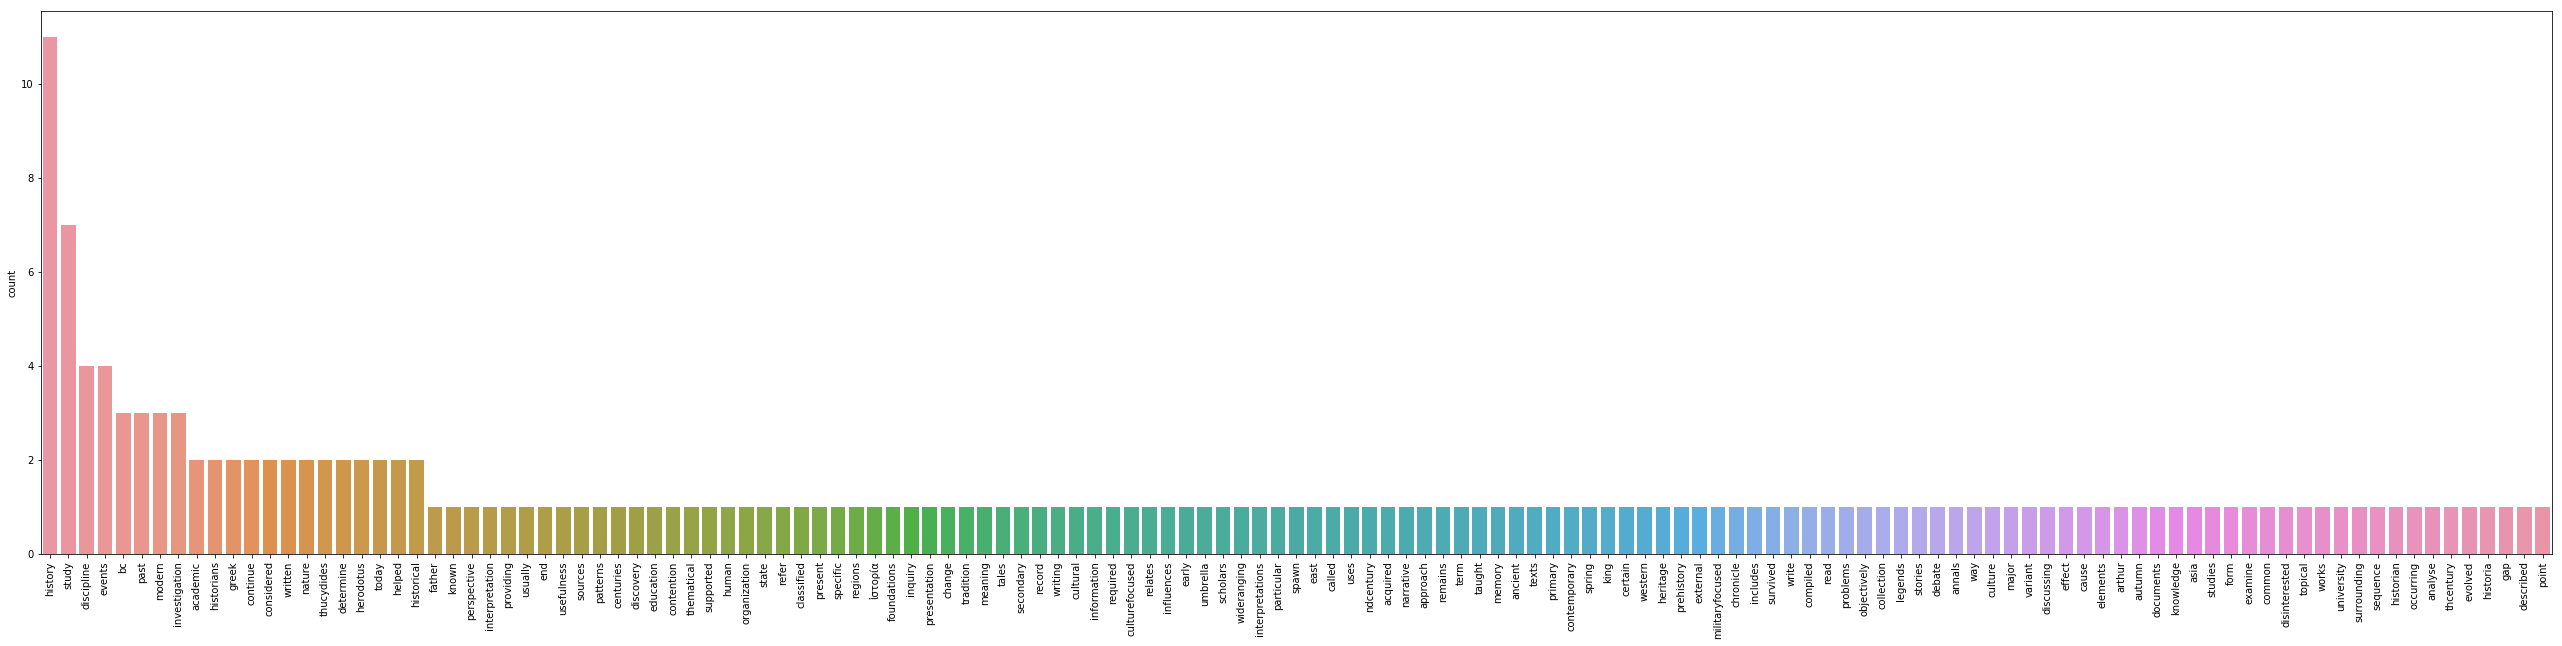

In [113]:
plt.figure(figsize=(45,10))
sns.countplot(words_nostop, order=pd.Series(words_nostop).value_counts().index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

(double click the plot to enlarge)

### <font color='magenta'> Q7. Based on the word frequency results, what was the paragraph about? </font>

This paragraph was about the modern study of Green history during the BC era, including events, possibly written.

# Extracting linguistic features from spaCy

## Tokenize
- Token: a semantic unit for analysis
    - (Loosely) equal term for word
        - ```sent_low_pnct.split()```
    - Tricky cases
        - aren't $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img88.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img89.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img86.png) ?
        - O'Neil $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img83.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img84.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img81.png) ?
        - https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
- In ```spaCy```:
    - Many token types, like word, puntuation symbol, whitespace, etc.

### Let's dissect the sentence!

- initiating the ```spaCy``` object 

In [115]:
# examples partially taken from https://nlpforhackers.io/complete-guide-to-spacy/
import spacy
nlp = spacy.load(r'C:\Users\dteng\Anaconda\Lib\site-packages\en_core_web_sm\en_core_web_sm-2.0.0')

- Our sentence: "Hello World!"
    - Pass the sentence string to the ```spaCy``` object ```nlp```

In [116]:
doc = nlp("Hello World!")

- The sentence is considered as a short document.

In [117]:
print(type(doc), doc)

<class 'spacy.tokens.doc.Doc'> Hello World!


- As importing the sentence string above, ```spaCy``` splited the sentence into tokens (tokenization!)

In [118]:
for i,token in enumerate(doc):
    print(i, token)

0 Hello
1 World
2 !


- With index information (location from the sentence) of each token

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11|
|---|---|---|---|---|---|---|---|---|---|---|---|
| H | e | l | l | o | _ | W | o | r | l | d | ! |

In [119]:
for i, token in enumerate(doc):
    print(i, token.text, token.idx) 


0 Hello 0
1 World 6
2 ! 11


- And many more!
    - https://spacy.io/api/token#attributes

In [120]:
doc = nlp("What did you do during the study break   ?")

print("text \t idx \t lemma \t lower \t is_punct \t is_space \t shape \t POS")
for token in doc:
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.lower_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_
    ))


text 	 idx 	 lemma 	 lower 	 is_punct 	 is_space 	 shape 	 POS
What	0	what	what	False	False	Xxxx	NOUN
did	5	do	did	False	False	xxx	VERB
you	9	-PRON-	you	False	False	xxx	PRON
do	13	do	do	False	False	xx	VERB
during	16	during	during	False	False	xxxx	ADP
the	23	the	the	False	False	xxx	DET
study	27	study	study	False	False	xxxx	NOUN
break	33	break	break	False	False	xxxx	NOUN
  	39	  	  	False	True	  	SPACE
?	41	?	?	True	False	?	PUNCT


## Sentence detection

- For the document with multiple sentences, we would need to separate between each sentences.
- In ```spaCy```, the job is more convinient (and would cause less mistatkes) than using regular expression

### <font color='magenta'> Q8. How would you separate sentences? What's your intuition? </font>

I would first try all the common punctuations; obviously this would cause issues with abbreviations that use '.'

- Our multiple sentence document: 

In [121]:
doc_multsent = "These are apples. Those are oranges from N.Y.C. and...? How about pineapples? Not carrots!!!"

- in regular expression...

In [122]:
import re
sentences = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", doc_multsent) # how would I remember this pattern without Google/StackOverflow?
for i, sent in enumerate(sentences):
    print(i, sent)

0 These are apples.
1 Those are oranges from N.Y.C. and...?
2 How about pineapples?
3 Not carrots!!!


- in ```spaCy```!

In [123]:
# same document, but initiate as the spaCy object...
doc = nlp(doc_multsent)

- Sentences are stored as a generator object
    - Instead of storing sentences as a list, each sentence is stored as a item in the generator object 
    - Iteratable (i.e., can be used in a for loop)
    - More efficient memory use
    - https://wiki.python.org/moin/Generators

In [124]:
doc.sents

- Prining sentences with the index number

In [125]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 These are apples.
1 Those are oranges from N.Y.C.
2 and...?
3 How about pineapples?
4 Not carrots!!!


### <font color='magenta'> Q9. Separate sentences in the following paragraph, and print sentences with the index number. </font>

In [126]:
# from https://en.wikipedia.org/wiki/Portal:History
sentences = """History (from Greek ἱστορία, historia, meaning "inquiry, knowledge acquired by investigation") is the study of the past as it is described in written documents. Events occurring before written record are considered prehistory. It is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events. Scholars who write about history are called historians.

History can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events, and objectively determine the patterns of cause and effect that determine them. Historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing "perspective" on the problems of the present.

Stories common to a particular culture, but not supported by external sources (such as the tales surrounding King Arthur), are usually classified as cultural heritage or legends, because they do not show the "disinterested investigation" required of the discipline of history. Herodotus, a 5th-century BC Greek historian is considered within the Western tradition to be the "father of history", and, along with his contemporary Thucydides, helped form the foundations for the modern study of human history. Their works continue to be read today, and the gap between the culture-focused Herodotus and the military-focused Thucydides remains a point of contention or approach in modern historical writing. In East Asia, a state chronicle, the Spring and Autumn Annals was known to be compiled from as early as 722 BC although only 2nd-century BC texts survived.

Ancient influences have helped spawn variant interpretations of the nature of history which have evolved over the centuries and continue to change today. The modern study of history is wide-ranging, and includes the study of specific regions and the study of certain topical or thematical elements of historical investigation. Often history is taught as part of primary and secondary education, and the academic study of history is a major discipline in university studies."""

In [128]:
doc = nlp(sentences.replace('\n\n', ' '))
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 History (from Greek ἱστορία, historia, meaning "inquiry, knowledge acquired by investigation") is the study of the past as it is described in written documents.
1 Events occurring before written record are considered prehistory.
2 It is an umbrella term that relates to past events as well as the memory, discovery, collection, organization, presentation, and interpretation of information about these events.
3 Scholars who write about history are called historians.
4 History can also refer to the academic discipline which uses a narrative to examine and analyse a sequence of past events, and objectively determine the patterns of cause and effect that determine them.
5 Historians sometimes debate the nature of history and its usefulness by discussing the study of the discipline as an end in itself and as a way of providing "perspective" on the problems of the present.
6 Stories common to a particular culture, but not supported by external sources (such as the tales surrounding King Arth

## POS tagging

- I want to find words with particular part-of-speech!
- Different part-of-speech words carry different information
    - e.g., noun (subject), verb (action term), adjective (quality of the object) 
- https://spacy.io/api/annotation#pos-tagging

- Yelp review!

In [129]:
# from https://www.yelp.com/biz/ajishin-novi?hrid=juA4Zn2TX7845vNFn4syBQ&utm_campaign=www_review_share_popup&utm_medium=copy_link&utm_source=(direct)
doc = nlp("""One of the best Japanese restaurants in Novi. Simple food, great taste, amazingly price. I visit this place a least twice month.""")

### <font color='magenta'> Q10a. What can you infer from this review? </font>
- What type of the restaurant?
- Location?
- What did the reviewer liked about?
- How often did the person visit the place?
- Any other information?

Restaurant is a Japanese restaurant.

Located in Novi.

Food is simple, tastes great, and is fairly priced.

Reviewers visits about twice a month.

- multiple sentences exist in a document

In [130]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 One of the best Japanese restaurants in Novi.
1 Simple food, great taste, amazingly price.
2 I visit this place a least twice month.


- Question: which words are adjective (ADJ)?

In [131]:
for i, sent in enumerate(doc.sents):
    print("__sentence__:", i)
    print("_token_ \t _POS_")
    for token in sent:
        print(token.text, "\t", token.pos_)

__sentence__: 0
_token_ 	 _POS_
One 	 NUM
of 	 ADP
the 	 DET
best 	 ADJ
Japanese 	 ADJ
restaurants 	 NOUN
in 	 ADP
Novi 	 PROPN
. 	 PUNCT
__sentence__: 1
_token_ 	 _POS_
Simple 	 ADJ
food 	 NOUN
, 	 PUNCT
great 	 ADJ
taste 	 NOUN
, 	 PUNCT
amazingly 	 ADV
price 	 NOUN
. 	 PUNCT
__sentence__: 2
_token_ 	 _POS_
I 	 PRON
visit 	 VERB
this 	 DET
place 	 NOUN
a 	 DET
least 	 ADJ
twice 	 ADJ
month 	 NOUN
. 	 PUNCT


## Gramatical dependency
- Words are gramatically related in a sentence.
- Conveys much semantic information about the sentential context.

- And dependency relationships also can be extracted as string

In [132]:
for token in doc:
    print('"' + token.text + '", ', token.pos_, list(token.ancestors), (token.dep_))

"One",  NUM [] ROOT
"of",  ADP [One] prep
"the",  DET [restaurants, of, One] det
"best",  ADJ [restaurants, of, One] amod
"Japanese",  ADJ [restaurants, of, One] amod
"restaurants",  NOUN [of, One] pobj
"in",  ADP [restaurants, of, One] prep
"Novi",  PROPN [in, restaurants, of, One] pobj
".",  PUNCT [One] punct
"Simple",  ADJ [food] amod
"food",  NOUN [] ROOT
",",  PUNCT [food] punct
"great",  ADJ [taste, food] amod
"taste",  NOUN [food] conj
",",  PUNCT [taste, food] punct
"amazingly",  ADV [price, taste, food] compound
"price",  NOUN [taste, food] appos
".",  PUNCT [food] punct
"I",  PRON [visit] nsubj
"visit",  VERB [] ROOT
"this",  DET [place, visit] det
"place",  NOUN [visit] dobj
"a",  DET [month, visit] det
"least",  ADJ [twice, month, visit] amod
"twice",  ADJ [month, visit] nummod
"month",  NOUN [visit] npadvmod
".",  PUNCT [visit] punct


```spaCy``` follows the ```ClearNLP``` annotations for dependency parsing
- https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md

### <font color='magenta'> Q10b: (Now answer the same question based on the POS/dependency parsing results) What can you infer from this review? </font>
- What type of the restaurant?
- Location?
- What did the reviewer liked about?
- How often did the person visit the place?
- Any other information?

Restaurant is one of the best Japanese restaurants.

Located in Novi.

Food is simple, tastes great, and is fairly priced.

Reviewers visits at least twice a month.

# Word embedding

- So far, we seen how we can extract some interesting syntactic characteristics from text from using ```spacy```
- It extracted the characteristics, but did not indicate what it means
- Can machines understand semantic relationship between words?

- Distributional semantics
    - Representing semantic information of words in a geometric semantic space
        - Different relationship between words: explained by geometric relationship between words 
        - e.g., Related words are located closer to each other; 
    - And it's often called as *word embedding*

#### Word2Vec
- Developed by [Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Represent the meaning of the words as a vector
    - Vector: numeric array
    - Output of a neural network model that predicts the next word
- Surprisingly, many different semantic informations can be represented from word vectors of ```Word2Vec```
- (More explanation in here: https://www.tensorflow.org/tutorials/representation/word2vec)

<img src="https://www.tensorflow.org/images/softmax-nplm.png" width="400">

![](https://www.tensorflow.org/images/linear-relationships.png)

### Let's try with some example: words in a semantic space
$\rightarrow$ https://projector.tensorflow.org

### <font color='magenta'> Q11. Record any interesting findings from TensorFlow Projector page</font>

Unpaved is located far outside the cluster. Relationally, unpaved is related to transportation, mainly airports. Suprisingly, it is also related to waterways and harbors.

## OK. Let's try some more details in our local machines!
- Download the [pretrained model](https://drive.google.com/open?id=10GXpuviDJVa-k8ZmiYX3BVABNDRaA6tg) and place it in the same folder as this notebook
- We are using [gensim](https://radimrehurek.com/gensim/) package this time

In [ ]:
# ! conda install -y gensim

In [136]:
import gensim

In [137]:
# from https://github.com/eyaler/word2vec-slim
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

## Calculating similarity between words

- Q: What's similarity between *school* and *student*?

- the word vector for *school* looks like this:

In [138]:
w2v_mod['school']

array([ 3.70471478e-02,  1.14410305e-02,  1.49575379e-02,  8.87546614e-02,
        3.96226160e-02, -2.67452672e-02,  6.33961856e-02, -1.90188568e-02,
       -1.89445645e-03, -3.68490331e-02,  1.01037674e-01,  1.85235739e-02,
        2.69433800e-02, -4.00188453e-02, -4.29905392e-02,  4.31886539e-02,
       -8.12263638e-02,  5.72051527e-03,  5.54716662e-02, -3.56603563e-02,
        8.32074955e-02,  6.93395808e-02,  4.72994987e-03,  6.97358102e-02,
        1.96874887e-03, -1.41848966e-01,  9.22464067e-04,  7.48867467e-02,
        4.85377051e-02, -1.02028241e-02,  4.14056368e-02, -4.33867648e-02,
        1.62452739e-02,  3.04598873e-03, -6.61697686e-02, -6.06226064e-02,
        9.27169248e-02, -2.04056483e-02,  1.88207440e-02,  5.07169515e-02,
        5.29952534e-03,  5.19056283e-02,  4.47735563e-02, -2.05047056e-02,
        1.39669729e-02,  5.86414747e-02,  6.97358102e-02, -1.12924464e-02,
       -4.49716710e-02,  9.31131542e-02, -4.75471430e-02, -4.95282710e-02,
       -1.44251098e-03, -

In [139]:
len(w2v_mod['school'])

300

- and the word vector for *student* looks like this:

In [140]:
w2v_mod['student']

array([ 0.01336551,  0.00730235,  0.08037006,  0.05629445,  0.06479172,
        0.01141821,  0.11400511, -0.01221483,  0.0559404 , -0.1359564 ,
        0.01849928, -0.04779717, -0.04337151, -0.05027555, -0.0073466 ,
        0.00477972, -0.02442967, -0.02389859, -0.00907261, -0.05098365,
        0.00783343,  0.06302146, -0.00064449, -0.03328099, -0.03540531,
       -0.17844278, -0.04956744, -0.002069  ,  0.06160524,  0.0366445 ,
        0.03416613, -0.03983098, -0.03080262,  0.01964995, -0.02372156,
       -0.00610742,  0.04071611,  0.0506296 , -0.03009452,  0.08072411,
       -0.08638897,  0.0426634 , -0.01672901,  0.03115668,  0.0619593 ,
       -0.02496075,  0.01451618, -0.03752963,  0.05771066,  0.0179682 ,
       -0.03947692, -0.05452418,  0.0054657 , -0.01964995,  0.0906376 ,
       -0.03452018, -0.04284043,  0.04036206,  0.07435116, -0.03629045,
        0.00610742, -0.03452018, -0.00111748, -0.00489036,  0.03363505,
       -0.0306256 ,  0.03080262, -0.02009252,  0.05735661,  0.03

- the similarity between two word vectors is:

In [141]:
w2v_mod.similarity('school', 'student')

0.605562749213432

### Methods for measuring similarity

<table>
<tr>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_76-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-36.jpg" width="400"></td>
    <td><img src="https://nickgrattan.files.wordpress.com/2014/06/screenhunter_77-jun-10-08-37.jpg" width="400"></td>
</tr>
</table>

- Euclidean distance
    - The most common use of distance
    - $ \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $

In [142]:
# (images from https://nickgrattan.wordpress.com/2014/06/10/euclidean-manhattan-and-cosine-distance-measures-in-c/)
np.sqrt(np.power((12-5), 2) + np.power((14-11), 2))

7.615773105863909

- Manhattan distance
    - Distance = the sum of differences in the grid
    - $|x_1 - x_2| + |y_1 - y_2|$

In [143]:
np.abs(12-5) + np.abs(14-11)

10

- Cosine similarity 
    - Often used to measure similarity between vectors
    - $cos(\theta) = \frac{\sum_{i=1}^{n} A_i B_i }{\sqrt{\sum_{i=1}^{n} A_i^2 } \sqrt{\sum_{i=1}^{n} B_i^2 }}$ 
    - https://en.wikipedia.org/wiki/Cosine_similarity

In [144]:
a = np.array([12, 14])
b = np.array([5, 11])
a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2))))

0.9605011450474118

In [145]:
# (image from http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

![](http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png)

- Cosine simiarity can go from -1 to 1
- But usually, we deal with 0 to 1 scores for comparing words in ```Word2Vec```

### <font color='magenta'> Q12a. What's the cosine similarity between *school* and *tiger*? </font>
- How would you interprete the results?

There is a very low similarity between *school* and *tiger*

In [146]:
w2v_mod.similarity('school', 'tiger')

0.08660267014184596

### <font color='magenta'> Q12b. Try some other words. Any other interesting findings? </font>
- Give 3 more examples.
- How would you interprete the results?

In [148]:
w2v_mod.similarity('water', 'fire')

0.22717671979550713

In [152]:
w2v_mod.similarity('life', 'oxygen')

0.18207292619824916

In [153]:
w2v_mod.similarity('college', 'stress')

0.1429403975479494

The third is a lie; there is obviously a conspiracy in the linguistics field. School and stress should have a correlation of 1.

It is also very interesting that life and oxygen have a lower correlation than water and fire.

## Analogy from word vectors

<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $woman - man + king \approx ?$
- How this works?
    - $woman:man \approx x:king $
    - $\rightarrow woman - man \approx x - king $
    - $\rightarrow woman - man + king \approx x$
    - List top-10 words ($x$) that can solve the equation!

In [154]:
w2v_mod.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431607246399),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114)]

- $Spain - Germany + Berlin \approx ?$
    - $\rightarrow Spain - Germany \approx x -  Berlin $

In [ ]:
w2v_mod.most_similar(positive=['Spain', 'Berlin'], negative=['Germany'])

### <font color='magenta'> Q13. Any other interesting examples? </font>
- Give 3 more examples.
- How would you interprete the results?

(type in your response here)

In [ ]:
# put your code here

## Constructing interpretable semantic scales 

- So far, we saw that word vectors effectively carries (although not perfect) the semantic information.
- Can we design something more interpretable results from using the semantic space?

- Let's re-try with real datapoints in [here](https://projector.tensorflow.org): *politics* words in a *bad-good* PCA space

In [ ]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

- Can we regenerate this results with our embedding model?

### Let's plot words in the 2D space
- Using Bad & Good axes
- Calculate cosine similarity between an evaluating word (violence, discussion, and issues) with each scale's end (bad, and good)

In [ ]:
pol_words_sim_2d = pd.DataFrame([[cosine_similarity(w2v_mod['violence'], w2v_mod['good']), cosine_similarity(w2v_mod['violence'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['discussion'], w2v_mod['good']), cosine_similarity(w2v_mod['discussion'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['issues'], w2v_mod['good']), cosine_similarity(w2v_mod['issues'], w2v_mod['bad'])]],
                                index=['violence', 'discussion', 'issues'], columns=['good', 'bad'])

In [ ]:
pol_words_sim_2d

- If we plot this:

In [ ]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

- violence: less good, more bad
- discussion: less bad, more good
- issues: both bad and good

### Can we do this in an 1D scale?
(bad) --------------------?---- (good)

- First, let's create the vector for *bad-good* scale

In [ ]:
scale_bad_good = w2v_mod['good'] - w2v_mod['bad']

- Calculate the cosine similarity score of the word *violence* in the *bad-good* scale 
    - $sim(V(violence), V(bad) - V(good))$

In [ ]:
cosine_similarity(w2v_mod['violence'], scale_bad_good)

- $sim(V(discussion), V(bad) - V(good))$

In [ ]:
cosine_similarity(w2v_mod['discussion'], w2v_mod['good'] - w2v_mod['bad'])

- $sim(V(issues), V(bad) - V(good))$

In [ ]:
cosine_similarity(w2v_mod['issues'], w2v_mod['good'] - w2v_mod['bad'])

In summary, as displayed in Embedding Projector, words *violence*, *discussion*, and *issues* are located in the *bad-good* scale as following:

In [ ]:
pol_words_sim = pd.DataFrame([cosine_similarity(w2v_mod['violence'], w2v_mod['good'] - w2v_mod['bad']),
                              cosine_similarity(w2v_mod['discussion'], w2v_mod['good'] - w2v_mod['bad']),
                              cosine_similarity(w2v_mod['issues'], w2v_mod['good'] - w2v_mod['bad'])],
                             index=['violence', 'discussion', 'issues'], columns=['cos_sim'])

In [ ]:
pol_words_sim

In [ ]:
ax = sns.barplot(x=pol_words_sim.index, y=pol_words_sim.cos_sim)
ax.set(ylabel="bad_good scale")
plt.show()

- *Violence* is more close to the *bad* end of the scale, while *discussion* is located towards the *good* end of the scale. *Issues* is located between those two words in the *bad-good* scale. 

### <font color='magenta'> Q14.  Select different scale and a set of words. How words are represented in the your suggested semantic scale? </font>
- Why did you selected the particular scale and words? what's your interpretation?

(type in your response here)

In [ ]:
# put your code here

- more to read about this method:     http://bookworm.benschmidt.org/posts/2015-10-25-Word-Embeddings.html